# Lab 1

## Part 2: Neural Machine Translation in the wild
In the third homework you are supposed to get the best translation you can for the EN-RU translation task.

Basic approach using RNNs as encoder and decoder is implemented for you. 

Your ultimate task is to use the techniques we've covered, e.g.

* Optimization enhancements (e.g. learning rate decay)

* CNN encoder (with or without positional encoding)

* attention/self-attention mechanism

* pretraining the language model

* [Byte Pair Encoding](https://github.com/rsennrich/subword-nmt)

* or just fine-tunning BERT ;)

to improve the translation quality. 

__Please use at least three different approaches/models and compare them (translation quality/complexity/training and evaluation time).__

Write down some summary on your experiments and illustrate it with convergence plots/metrics and your thoughts. Just like you would approach a real problem.

In [1]:
# Thanks to YSDA NLP course team for the data
# (who thanks tilda and deephack teams for the data in their turn)
!curl https://raw.githubusercontent.com/girafe-ai/ml-mipt/master/datasets/Machine_translation_EN_RU/data.txt

Cordelia Hotel is situated in Tbilisi, a 3-minute walk away from Saint Trinity Church.	Отель Cordelia расположен в Тбилиси, в 3 минутах ходьбы от Свято-Троицкого собора.
At Tupirmarka Lodge you will find a 24-hour front desk, room service, and a snack bar.	В числе удобств лоджа Tupirmarka круглосуточная стойка регистрации и снэк-бар. Гости могут воспользоваться услугой доставки еды и напитков в номер.
Featuring free WiFi in all areas, Naigao Xiaowo offers accommodation in Shanghai.	Апартаменты Naigao Xiaowo расположены в городе Шанхай. К услугам гостей бесплатный Wi-Fi во всех зонах.
Each has a TV and a private bathroom with shower.	В вашем распоряжении также телевизор и собственная ванная комната с душем.
Your room comes with air conditioning and satellite TV.	Номер оснащен кондиционером и спутниковым телевидением.
They are styled in cream-coloured hues and some of them feature private balconies with seating areas.	Они оформлены в кремовых тонах, в некоторых из них имеются отдельные б

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Выходные данные были обрезаны до нескольких последних строк (5000).
A continental breakfast with pastries and freshly squeezed juices is served in the living room.	В гостиной накрывается континентальный завтрак, в меню которого выпечка и свежевыжатые соки.
Rooms at the Flamboyant are spacious and elegantly decorated, using the colours of the sea and the African wood as inspiration.	Просторные номера гостевого дома Flamboyant имеют элегантное оформление, вдохновленное морскими красками и африканским деревом.
Roma Cave Suite offers a selection of traditional cave-style rooms built into a hillside in Goreme.	Отель Roma Cave Suite с традиционными номерами-пещерами расположен на склоне холма в городке Гёреме.
Kalibo Airport is a 2-hours drive away.	Поездка до аэропорта Калибо занимает 2 часа.
A flat-screen TV is offered.	В числе прочих удобств телевизор с плоским экраном.
Set a 2.5 km from the beaches of Francavilla Al Mare, Agriturismo Lo Scacciapensieri is in the Abruzzo hills. It offers 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



ов от апартаментов Le Cocon Petite France, рождественского рынок Страсбурга — в 200 метрах.
Free WiFi is provided .	Действует бесплатный Wi-Fi.
A shuttle service is available to Bryansk Central Station (15 minutes) and Bryansk International Airport.	Предоставляется трансфер от/до Центрального железнодорожного вокзала Брянска (15 минут) и международного аэропорта Брянск.
Some boast views of Lake Garda.	Из некоторых апартаментов открывается вид на озеро Гарда.
You can play tennis at the property, and the area is popular for skiing and horse riding.	Гостям могут поиграть в теннис в апартаментах. В окрестностях пользуются популярностью катание на лыжах и верховая езда.
The sandy beach of Falassarna lies within a 30-minute drive.	Песчаный пляж Фалассарна расположен в 30 минутах езды.
Guests can request for laundry and ironing services.	Гости могут воспользоваться услугами прачечной и гладильными услугами.
New Century Melaka Hotel is located a 18-minute drive from Menara Taming Sari and a 90

The `data.txt` is a tsv file, each line of which contains a sentence in english and a corresponding translation, separated by `\t`. We'll load it into memory and create a list of pairs, which would yield the same interface as with the torchtext's datasets.

In [4]:
with open("data.txt", encoding="utf-8") as f:
    data = [l.rstrip().split("\t") for l in f]

print(f"Dataset size {len(data):,}")
print("Sample:")
data[:5]

Dataset size 50,000
Sample:


[['Cordelia Hotel is situated in Tbilisi, a 3-minute walk away from Saint Trinity Church.',
  'Отель Cordelia расположен в Тбилиси, в 3 минутах ходьбы от Свято-Троицкого собора.'],
 ['At Tupirmarka Lodge you will find a 24-hour front desk, room service, and a snack bar.',
  'В числе удобств лоджа Tupirmarka круглосуточная стойка регистрации и снэк-бар. Гости могут воспользоваться услугой доставки еды и напитков в номер.'],
 ['Featuring free WiFi in all areas, Naigao Xiaowo offers accommodation in Shanghai.',
  'Апартаменты Naigao Xiaowo расположены в городе Шанхай. К услугам гостей бесплатный Wi-Fi во всех зонах.'],
 ['Each has a TV and a private bathroom with shower.',
  'В вашем распоряжении также телевизор и собственная ванная комната с душем.'],
 ['Your room comes with air conditioning and satellite TV.',
  'Номер оснащен кондиционером и спутниковым телевидением.']]

## Data preprocessing

First of all, let's split our dataset into train, test and validation.

In [5]:
import torch
from torch.utils.data import random_split


data_size = len(data)
train_size = int(0.8 * data_size)
test_size = int(0.15 * data_size)
val_size = data_size - train_size - test_size
train_data, test_data, val_data = random_split(
    data, [train_size, test_size, val_size], generator=torch.Generator().manual_seed(42)
)
print(f"Train size: {len(train_data)}")
print(f"Test size: {len(test_data)}")
print(f"Val size: {len(val_data)}")

Train size: 40000
Test size: 7500
Val size: 2500


Here comes the preprocessing. If you find pieces, that you don't understand, please, go back to 3rd week's practice notebook. The code is mostly taken from it.

Do not hesitate to use BPE or more complex preprocessing pipeline ;)

In [6]:
from nltk.tokenize import WordPunctTokenizer


tokenizer = WordPunctTokenizer()


def tokenize(sent):
    return tokenizer.tokenize(sent.lower())

In [7]:
from collections import Counter

from torchtext.vocab import vocab as Vocab


src_counter = Counter()
trg_counter = Counter()
for src, trg in train_data:
    src_counter.update(tokenize(src))
    trg_counter.update(tokenize(trg))

src_vocab = Vocab(src_counter, min_freq=3)
trg_vocab = Vocab(trg_counter, min_freq=3)

In [8]:
unk_token = "<unk>"
sos_token, eos_token, pad_token = "<sos>", "<eos>", "<pad>"
specials = [sos_token, eos_token, pad_token]

for vocab in [src_vocab, trg_vocab]:
    if unk_token not in vocab:
        vocab.insert_token(unk_token, index=0)
        vocab.set_default_index(0)

    for token in specials:
        if token not in vocab:
            vocab.append_token(token)

print(f"Source (en) vocabulary size: {len(src_vocab)}")
print(f"Target (ru) vocabulary size: {len(trg_vocab)}")

Source (en) vocabulary size: 6711
Target (ru) vocabulary size: 9310


In [9]:
def encode(sent, vocab):
    tokenized = [sos_token] + tokenize(sent) + [eos_token]
    return [vocab[tok] for tok in tokenized]

In [10]:
from torch.nn.utils.rnn import pad_sequence
from torch.utils.data import DataLoader


def collate_batch(batch):
    src_list, trg_list = [], []
    for src, trg in batch:
        src_encoded = encode(src, src_vocab)
        src_list.append(torch.tensor(src_encoded))

        trg_encoded = encode(trg, trg_vocab)
        trg_list.append(torch.tensor(trg_encoded))

    src_padded = pad_sequence(src_list, padding_value=src_vocab[pad_token])
    trg_padded = pad_sequence(trg_list, padding_value=trg_vocab[pad_token])
    return src_padded, trg_padded


batch_size = 256
train_dataloader = DataLoader(train_data, batch_size, shuffle=True, collate_fn=collate_batch)
val_dataloader = DataLoader(val_data, batch_size, shuffle=False, collate_fn=collate_batch)
test_dataloader = DataLoader(test_data, batch_size, shuffle=False, collate_fn=collate_batch)

src_batch, trg_batch = next(iter(train_dataloader))
src_batch.shape, trg_batch.shape

(torch.Size([58, 256]), torch.Size([51, 256]))

In [11]:
trg_batch[:, 0]

tensor([9307, 1025,    9, 1023, 1024,  545,  100,  689,  690,   15, 9308, 9309,
        9309, 9309, 9309, 9309, 9309, 9309, 9309, 9309, 9309, 9309, 9309, 9309,
        9309, 9309, 9309, 9309, 9309, 9309, 9309, 9309, 9309, 9309, 9309, 9309,
        9309, 9309, 9309, 9309, 9309, 9309, 9309, 9309, 9309, 9309, 9309, 9309,
        9309, 9309, 9309])

## Model side

## Attention

* Compute logits with a 2-layer neural network
$$a_t = linear_{out}(tanh(linear_{e}(h^e_t) + linear_{d}(h_d)))$$
* Get probabilities from logits, 
$$ p_t = {{e ^ {a_t}} \over { \sum_\tau e^{a_\tau} }} $$

* Add up encoder states with probabilities to get __attention response__
$$ attn = \sum_t p_t \cdot h^e_t $$


In [12]:
import torch.nn as nn
import torch.nn.functional as F

class AttentionLayer(nn.Module):
    def __init__(self, enc_size, dec_size, hid_size, activ=torch.tanh):
        """ A layer that computes additive attention response and weights """
        super().__init__()
        self.enc_size = enc_size # num units in encoder state
        self.dec_size = dec_size # num units in decoder state
        self.hid_size = hid_size # attention layer hidden units
        self.activ = activ       # attention layer hidden nonlinearity
               
        self.lin_enc = nn.Linear(self.enc_size, self.hid_size)
        self.lin_dec = nn.Linear(self.dec_size, self.hid_size)
        self.lin_out = nn.Linear(self.hid_size, 1)        

    def forward(self, enc, dec, inp_mask):
        """
        Computes attention response and weights
        :param enc: encoder activation sequence, float32[batch_size, ninp, enc_size]
        :param dec: single decoder state used as "query", float32[batch_size, dec_size]
        :param inp_mask: mask on enc activatons (0 after first eos), float32 [batch_size, ninp]
        :returns: attn[batch_size, enc_size], probs[batch_size, ninp]
            - attn - attention response vector (weighted sum of enc)
            - probs - attention weights after softmax
        """
        # тут прочитал внимательно документацию nn.Linear и понял, что написал то, что уже написано :)
        attention_papams = self.lin_out(self.activ(self.lin_enc(enc) + self.lin_dec(dec)[:,None,:]))
        attention_papams = attention_papams.view(attention_papams.shape[0], -1)

        # Apply mask - if mask is 0, logits should be -inf or -1e9
        # You may need torch.where
        if inp_mask is not None:
            attention_papams *=  inp_mask 

        device = self.lin_enc.weight.device
        result_params = torch.where(attention_papams==0, (torch.ones(attention_papams.shape)*(-1e9)).to(device), attention_papams)

        # Compute attention probabilities (softmax)
        # print(result_params.shape)
        probs = F.softmax(result_params, dim=1) # probs[batch_size, ninp]

        # Compute attention response using enc and probs
        attn = torch.sum(probs[:,:,None] * enc, dim=1)

        return attn, probs

In [13]:
import random

class AttentionModel(nn.Module):
    def __init__(self, n_src_tokens, n_trg_tokens, emb_dim, hid_dim, attn_dim, n_layers, dropout):
        super().__init__()

        self.n_src_tokens = n_src_tokens
        self.n_trg_tokens = n_trg_tokens
        self.hid_dim = hid_dim
        self.attn_dim = attn_dim
        self.n_layers = n_layers

        self.enc_embedding = nn.Embedding(n_src_tokens, emb_dim)
        self.dec_embedding = nn.Embedding(n_trg_tokens, emb_dim)

        self.enc_dropout = nn.Dropout(dropout)
        self.dec_dropout = nn.Dropout(dropout)
        self.enc_lstm = nn.LSTM(emb_dim, hid_dim, n_layers, dropout=dropout)
        self.dec_lstm = nn.LSTMCell(emb_dim + hid_dim, hid_dim)
        self.out = nn.Linear(hid_dim, n_trg_tokens)
        self.norm = nn.LayerNorm(hid_dim)

        self.mask = None
        self.logits = nn.Linear(self.hid_dim, n_trg_tokens)

        self.attention = AttentionLayer(
            enc_size=self.hid_dim, 
            dec_size=self.hid_dim, 
            hid_size=self.attn_dim
            )

    def encode(self, src):

        seq_len, batch_size = src.shape        
        embedded = self.enc_embedding(src)
        embedded = self.enc_dropout(embedded)

        output, (hidden, cell) = self.enc_lstm(embedded)# output: (max_len, batch_size, hid_size)
        output = output.permute(1,0,2) # (bsz, len, hid)
        
        # dec_start = torch.zeros((batch_size, self.hid_dim), device=device)  # h_t
        # attn, first_attn_probs = self.attention(output, dec_start, self.mask)
        # print(attn.shape)

        return output, hidden, cell# , first_attn_probs

    def decode_step(self, enc_out, tokens, hidden, cell):
        
        attn, attn_probs = self.attention(enc_out, hidden, self.mask)
        out_emb = self.dec_embedding(tokens)
        # out_emb: (bsz, emb_dim)
        # hidden: (bsz, hid_dim)
        # cell: (bsz, hid_dim)
        # attn: (bsz, attn_dim)
        dec_input = torch.cat((attn, out_emb), dim=1)
        
        (hidden, cell) = self.dec_lstm(dec_input, (hidden, cell))
        logits = self.logits(hidden)  # (bsz, out_voc)
        preds = F.softmax(logits, dim=1)


        return logits, hidden, cell


    def forward(self, src, trg, teacher_forcing_ratio=0.5):
        trg_len, batch_size = trg.shape
        preds = []
        enc_output, hidden, cell = self.encode(src)

        # cell = cell[0]  # need only last lstm cell
        # dec_start = torch.zeros((batch_size, self.hid_dim), device=device)  # h_t
        hidden = torch.zeros((batch_size, self.hid_dim), device=device)  # h_0 for decoder
        hidden, _ = self.attention(enc_output, hidden, self.mask)
        cell = torch.zeros((batch_size, self.hid_dim), device=device)  # h_0 for decoder

        # First input to the decoder is the <sos> token.
        input = trg[0, :]
        for i in range(1, trg_len):
            pred, hidden, cell = self.decode_step(enc_output, input, hidden, cell)
            preds.append(pred)
            teacher_force = random.random() < teacher_forcing_ratio
            _, top_pred = pred.max(dim=1)
            input = trg[i, :] if teacher_force else top_pred

        return torch.stack(preds)

In [14]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

model = AttentionModel(
    len(src_vocab), 
    len(trg_vocab), 
    emb_dim=256, 
    hid_dim=512, 
    attn_dim=256,
    n_layers=1, 
    dropout=0.5
    ).to(device)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/rnn.py:65: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [15]:
def init_weights(m):
    for name, param in m.named_parameters():
        nn.init.uniform_(param, -0.08, 0.08)


model.apply(init_weights);

In [16]:
def count_parameters(model):
    return sum(p.numel() for p in model.parameters() if p.requires_grad)


print(f"The model has {count_parameters(model):,} trainable parameters")

The model has 18,119,869 trainable parameters


In [17]:
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
scheduler = torch.optim.lr_scheduler.ExponentialLR(optimizer, gamma=0.97)
criterion = nn.CrossEntropyLoss(ignore_index=trg_vocab[pad_token])
loss_history, train_loss_history, val_loss_history, val_bleu_history = [], [], [], []

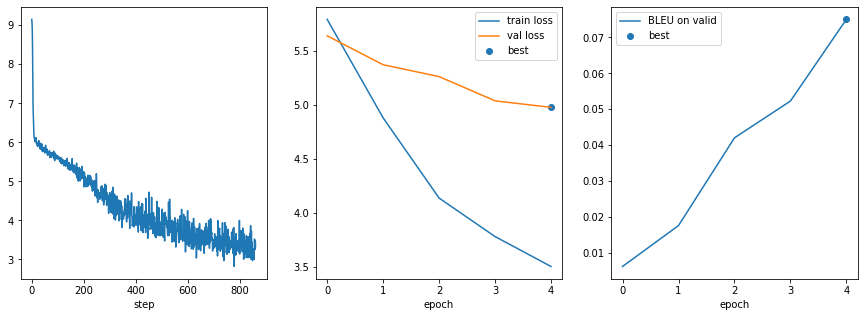

In [ ]:
import matplotlib.pyplot as plt
from IPython.display import clear_output
from torch.nn.utils import clip_grad_norm_
from nltk.translate.bleu_score import corpus_bleu


# Please don't use tensorboard here.
# It doesn't save the training plots in the notebook.
n_epochs = 50
clip = 1
max_val_loss = 1e5
trg_itos = trg_vocab.get_itos()
best_epoch = -1

for epoch in range(n_epochs):
    model.train()
    train_loss = 0
    for src, trg in train_dataloader:
        src, trg = src.to(device), trg.to(device)
        output = model(src, trg)

        output = output.view(-1, output.shape[-1])
        trg = trg[1:].view(-1)

        loss = criterion(output, trg)
        optimizer.zero_grad()
        loss.backward()
        clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

        train_loss += loss.item()
        loss_history.append(loss.item())

        if len(loss_history) % 10 == 0:
            clear_output(wait=True)

            plt.figure(figsize=(15, 5))

            plt.subplot(131)
            plt.plot(loss_history)
            plt.xlabel("step")

            plt.subplot(132)
            plt.plot(train_loss_history, label="train loss")
            plt.plot(val_loss_history, label="val loss")
            if best_epoch != -1:
                plt.scatter(best_epoch, val_loss_history[best_epoch], label='best')
            plt.xlabel("epoch")
            plt.legend()

            plt.subplot(133)
            plt.plot(val_bleu_history, label="BLEU on valid")
            if best_epoch != -1:
                plt.scatter(best_epoch, val_bleu_history[best_epoch], label='best')
            plt.xlabel("epoch")
            plt.legend()

            plt.show()

    train_loss /= len(train_dataloader)
    train_loss_history.append(train_loss)

    scheduler.step()
    model.eval()
    val_loss = 0
    with torch.no_grad():
        references, hypotheses = [], []
        for src, trg in val_dataloader:
            src, trg = src.to(device), trg.to(device)
            output = model(src, trg, teacher_forcing_ratio=0)
            out_for_bleu = output.cpu().numpy().argmax(axis=2)


            output = output.view(-1, output.shape[-1])
            trg_flat = trg[1:].view(-1)

            loss = criterion(output, trg_flat)
            val_loss += loss.item()

            for i in range(trg.shape[1]):
                reference = trg[:, i]
                reference_tokens = [trg_itos[id_] for id_ in reference]
                reference_tokens = [tok for tok in reference_tokens if tok not in specials]
                references.append(reference_tokens)

                hypothesis = out_for_bleu[:, i]
                hypothesis_tokens = [trg_itos[id_] for id_ in hypothesis]
                hypothesis_tokens = [tok for tok in hypothesis_tokens if tok not in specials]
                hypotheses.append(hypothesis_tokens)

    bleu = corpus_bleu([[ref] for ref in references], hypotheses)
    val_bleu_history.append(bleu)
    val_loss /= len(val_dataloader)
    val_loss_history.append(val_loss)

    if val_loss < max_val_loss:
        max_val_loss = val_loss
        best_epoch = epoch
        torch.save(model.state_dict(), 'model_best')

## Model evaluation

In [ ]:
trg_itos = trg_vocab.get_itos()
model.eval()
max_len = 50
with torch.no_grad():
    for i, (src, trg) in enumerate(val_data):
        encoded = encode(src, src_vocab)[::-1]
        encoded = torch.tensor(encoded)[:, None].to(device)
        hidden = model.encoder(encoded)

        pred_tokens = [trg_vocab[sos_token]]
        for _ in range(max_len):
            decoder_input = torch.tensor([pred_tokens[-1]]).to(device)
            pred, hidden = model.decoder(decoder_input, hidden)
            _, pred_token = pred.max(dim=1)
            if pred_token == trg_vocab[eos_token]:
                # Don't add it to prediction for cleaner output.
                break

            pred_tokens.append(pred_token.item())

        print(f"src: '{src.rstrip().lower()}'")
        print(f"trg: '{trg.rstrip().lower()}'")
        print(f"pred: '{' '.join(trg_itos[i] for i in pred_tokens[1:])}'")
        print()

        if i == 10:
            break

The metric often used in NMT is the BLEU. We'll also use it to evaluate our models. In fact, the goal of this homework is to beat the specified baseline BLEU scores.

Here is how you can calculate the score for your model:

In [ ]:
from nltk.translate.bleu_score import corpus_bleu


references, hypotheses = [], []
with torch.no_grad():
    for src, trg in test_dataloader:
        output = model(src.to(device), trg.to(device), teacher_forcing_ratio=0)
        output = output.cpu().numpy().argmax(axis=2)

        for i in range(trg.shape[1]):
            reference = trg[:, i]
            reference_tokens = [trg_itos[id_] for id_ in reference]
            reference_tokens = [tok for tok in reference_tokens if tok not in specials]
            references.append(reference_tokens)

            hypothesis = output[:, i]
            hypothesis_tokens = [trg_itos[id_] for id_ in hypothesis]
            hypothesis_tokens = [tok for tok in hypothesis_tokens if tok not in specials]
            hypotheses.append(hypothesis_tokens)

# corpus_bleu works with multiple references
bleu = corpus_bleu([[ref] for ref in references], hypotheses)
print(f"Your model shows test BLEU of {100 * bleu:.1f}")

## Attention

Baseline solution BLEU score is quite low. Try to achieve at least __24__ BLEU on the test set. 
The checkpoints are:

* __22__ - minimal score to submit the homework, 30% of points

* __27__ - good score, 70% of points

* __29__ - excellent score, 100% of points